## Activation Functions

* 인간의 뇌구조와 유사하게 wx+b의 값이 일정 이상이면 1 이하이면 0으로 간주

## Logistic regression units

* softmax에서 다루었던 function -> 위의 Activation functions을 구현 가능하다.

## False Promises

* 컴퓨터가 자신을 인식할 수 있는 단계에 이를 수 있을거라는 58년도의 허황된 기사.
* 간단하게 And/Or의 문제로 생각하기 시작(Linear로 구현 가능)
* Xor문제에 의해서 깨지게 됨(Linear로 구현 불가, 구현 돼도 낮은 정확도)
* (MLP:Multilayer perceptrons)를 통해서 Xor문제를 풀 수 있다, 단 학습 불가능

## Backpropagation

* 1974, 1982 Paul Werbos에 의해 발견, 후에 Hinton에 의해 재발견 -> CNN(알파고 적용)
* layer수가 많아질수록 제대로 작동하지 않는 큰 문제가 발생(SVM,RF 등 ML 모델들이 부상)
* 딥러닝의 두 번째 침체기

##  Breakthrough

* CIFAR의 지원을 통해 Hinton이 다시 한 번 딥러닝을 연구할 기회를 얻게 된다.
* 초기값을 잘 선택하면 학습을 할 수 있다고 발표 (2006, 2007 상당히 최근)
* 이미지 인식 정확도 2011년 25% 에러율 -> 2012년 15%, 2015년 5%미만 (획기적인 변화)



In [1]:
import tensorflow as tf
import numpy as np

In [7]:
# logistic regression -> Xor
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.sigmoid(tf.matmul(X,W) + b)

cost = tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X : x_data, Y : y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))
            
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict = {X : x_data, Y:y_data})
    print("\nHypothesis : ", h, "\nCorrect: ", c, "\nAccuracy : ", a)

0 -0.74976003 [[-0.824055 ]
 [ 1.0770754]]
100 -1.4350711 [[-0.44283152]
 [ 2.6037695 ]]
200 -4.896902 [[1.9331421]
 [5.090199 ]]
300 nan [[nan]
 [nan]]
400 nan [[nan]
 [nan]]
500 nan [[nan]
 [nan]]
600 nan [[nan]
 [nan]]
700 nan [[nan]
 [nan]]
800 nan [[nan]
 [nan]]
900 nan [[nan]
 [nan]]
1000 nan [[nan]
 [nan]]
1100 nan [[nan]
 [nan]]
1200 nan [[nan]
 [nan]]
1300 nan [[nan]
 [nan]]
1400 nan [[nan]
 [nan]]
1500 nan [[nan]
 [nan]]
1600 nan [[nan]
 [nan]]
1700 nan [[nan]
 [nan]]
1800 nan [[nan]
 [nan]]
1900 nan [[nan]
 [nan]]
2000 nan [[nan]
 [nan]]
2100 nan [[nan]
 [nan]]
2200 nan [[nan]
 [nan]]
2300 nan [[nan]
 [nan]]
2400 nan [[nan]
 [nan]]
2500 nan [[nan]
 [nan]]
2600 nan [[nan]
 [nan]]
2700 nan [[nan]
 [nan]]
2800 nan [[nan]
 [nan]]
2900 nan [[nan]
 [nan]]
3000 nan [[nan]
 [nan]]
3100 nan [[nan]
 [nan]]
3200 nan [[nan]
 [nan]]
3300 nan [[nan]
 [nan]]
3400 nan [[nan]
 [nan]]
3500 nan [[nan]
 [nan]]
3600 nan [[nan]
 [nan]]
3700 nan [[nan]
 [nan]]
3800 nan [[nan]
 [nan]]
3900 nan [[na

* logistic regreesion만으로는 결과가 좋지 않다.

## Neural Net(NN)

In [6]:
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1') 
#열 값을 증가시키면 network가 wide해짐
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X,W1) + b1)
#layer를 증가시키면 network가 deep해짐

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1,W2) + b2)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X : x_data, Y : y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))
            
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict = {X : x_data, Y:y_data})
    print("\nHypothesis : ", h, "\nCorrect: ", c, "\nAccuracy : ", a)

0 0.72043234 [[ 0.022793 ]
 [-0.9107998]]
100 0.6934269 [[ 0.022793 ]
 [-0.9107998]]
200 0.6933812 [[ 0.022793 ]
 [-0.9107998]]
300 0.6933429 [[ 0.022793 ]
 [-0.9107998]]
400 0.69330823 [[ 0.022793 ]
 [-0.9107998]]
500 0.69327646 [[ 0.022793 ]
 [-0.9107998]]
600 0.69324684 [[ 0.022793 ]
 [-0.9107998]]
700 0.69321877 [[ 0.022793 ]
 [-0.9107998]]
800 0.6931916 [[ 0.022793 ]
 [-0.9107998]]
900 0.69316494 [[ 0.022793 ]
 [-0.9107998]]
1000 0.6931385 [[ 0.022793 ]
 [-0.9107998]]
1100 0.69311166 [[ 0.022793 ]
 [-0.9107998]]
1200 0.69308406 [[ 0.022793 ]
 [-0.9107998]]
1300 0.69305545 [[ 0.022793 ]
 [-0.9107998]]
1400 0.69302523 [[ 0.022793 ]
 [-0.9107998]]
1500 0.692993 [[ 0.022793 ]
 [-0.9107998]]
1600 0.69295824 [[ 0.022793 ]
 [-0.9107998]]
1700 0.69292027 [[ 0.022793 ]
 [-0.9107998]]
1800 0.6928785 [[ 0.022793 ]
 [-0.9107998]]
1900 0.6928319 [[ 0.022793 ]
 [-0.9107998]]
2000 0.6927796 [[ 0.022793 ]
 [-0.9107998]]
2100 0.69272023 [[ 0.022793 ]
 [-0.9107998]]
2200 0.6926521 [[ 0.022793 ]
 [-

## Tensor board

In [9]:
# From Tf graph, decide which tensors you want to log
w2_hist = tf.summary.histogram("weights2", W2)
cost_sum = tf.summary.scalar("cost", cost)

# Merge all summaries
summary = tf.summary.merge_all()

# Create writer and add graph
writer = tf.summary.FileWriter('./logs')
writer.add_graph(sess.graph)

# Run summary merge and add summary
s, _ = sess.run([summary, train], feed_dict = {X:x_data,Y:y_data})
writer.add_summary(s, global_step=global_step)

# Launch TensorBoard
# tensorboard --logdir=./logs (on cmd)

RuntimeError: Attempted to use a closed Session.

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

W0723 21:12:03.915833 12332 deprecation.py:323] From <ipython-input-2-5c81c5f4c9da>:3: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0723 21:12:03.917827 12332 deprecation.py:323] From c:\users\tjrdn\miniconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0723 21:12:03.918828 12332 deprecation.py:323] From c:\users\tjrdn\miniconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Plea

Extracting MNIST_data/train-images-idx3-ubyte.gz


W0723 21:12:04.156193 12332 deprecation.py:323] From c:\users\tjrdn\miniconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0723 21:12:04.159183 12332 deprecation.py:323] From c:\users\tjrdn\miniconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0723 21:12:04.206088 12332 deprecation.py:323] From c:\users\tjrdn\miniconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future v

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
train_data = mnist.train
test_data = mnist.test


Hypothesis :  [[3.8547337e-02 2.8839707e-03 3.4348220e-02 ... 9.7842437e-01
  3.9979637e-02 1.1368972e-01]
 [1.0464132e-01 1.2952328e-02 7.0595980e-01 ... 2.6246905e-04
  8.0904067e-02 9.2086196e-04]
 [1.4491022e-02 9.1172081e-01 1.0031244e-01 ... 7.4311256e-02
  8.0129057e-02 5.5718511e-02]
 ...
 [1.3327599e-04 1.0027885e-03 9.4950199e-04 ... 2.6898712e-02
  7.2520763e-02 1.1165714e-01]
 [1.5962064e-02 2.9365003e-02 5.1467717e-03 ... 1.0069817e-02
  1.9567373e-01 4.5109987e-03]
 [6.5041572e-02 8.1211329e-05 4.9924284e-02 ... 6.3985586e-05
  5.8504939e-04 1.0948181e-03]] 
Correct:  [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
Accuracy :  0.96641
Label: [9]
Prediction: [9]


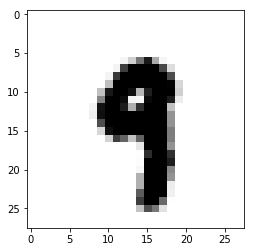

In [20]:
import random
import matplotlib.pyplot as plt
X = tf.placeholder(tf.float32,[None, 784])
Y = tf.placeholder(tf.float32,[None, 10])

W = tf.Variable(tf.zeros([784, 10]), name='weight')
b = tf.Variable(tf.zeros([10]), name='bias')

hypothesis = tf.sigmoid(tf.matmul(X,W) + b)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.2).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(1000):
        batch_xs, batch_ys = mnist.train.next_batch(100) #루프마다 무작정 배치된 100개의 데이터를 가져옴
        sess.run(train, feed_dict={X: batch_xs, Y: batch_ys})
            
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict = {X : test_data.images, Y:test_data.labels})
    print("\nHypothesis : ", h, "\nCorrect: ", c, "\nAccuracy : ", a)
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction:",sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1]}))
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

In [21]:
# From Tf graph, decide which tensors you want to log
w_hist = tf.summary.histogram("weights", W)
cost_sum = tf.summary.scalar("cost", cost)

# Merge all summaries
summary = tf.summary.merge_all()

# Create writer and add graph
writer = tf.summary.FileWriter('./logs')
writer.add_graph(sess.graph)

# Run summary merge and add summary
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.2)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
    
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100) #루프마다 무작정 배치된 100개의 데이터를 가져옴
    sess.run(train, feed_dict={X: batch_xs, Y: batch_ys})
    s, _ = sess.run([summary, train], feed_dict = {X:batch_xs,Y:batch_ys})
    
writer.add_summary(s, global_step=global_step)

# Launch TensorBoard
# tensorboard --logdir=./logs (on cmd)

InvalidArgumentError: Nan in summary histogram for: weights
	 [[node weights (defined at <ipython-input-21-094bd536d6c2>:2) ]]

Errors may have originated from an input operation.
Input Source operations connected to node weights:
 weight_15/read (defined at <ipython-input-20-aebfd77dc4ee>:6)

Original stack trace for 'weights':
  File "c:\users\tjrdn\miniconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\tjrdn\miniconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\tjrdn\miniconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\tjrdn\miniconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\users\tjrdn\miniconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "c:\users\tjrdn\miniconda3\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "c:\users\tjrdn\miniconda3\lib\asyncio\base_events.py", line 528, in run_forever
    self._run_once()
  File "c:\users\tjrdn\miniconda3\lib\asyncio\base_events.py", line 1764, in _run_once
    handle._run()
  File "c:\users\tjrdn\miniconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\tjrdn\miniconda3\lib\site-packages\tornado\ioloop.py", line 758, in _run_callback
    ret = callback()
  File "c:\users\tjrdn\miniconda3\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\tjrdn\miniconda3\lib\site-packages\tornado\gen.py", line 1233, in inner
    self.run()
  File "c:\users\tjrdn\miniconda3\lib\site-packages\tornado\gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "c:\users\tjrdn\miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "c:\users\tjrdn\miniconda3\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "c:\users\tjrdn\miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "c:\users\tjrdn\miniconda3\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "c:\users\tjrdn\miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "c:\users\tjrdn\miniconda3\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "c:\users\tjrdn\miniconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\users\tjrdn\miniconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\users\tjrdn\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "c:\users\tjrdn\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "c:\users\tjrdn\miniconda3\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "c:\users\tjrdn\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\users\tjrdn\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "c:\users\tjrdn\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-094bd536d6c2>", line 2, in <module>
    w_hist = tf.summary.histogram("weights", W)
  File "c:\users\tjrdn\miniconda3\lib\site-packages\tensorflow\python\summary\summary.py", line 179, in histogram
    tag=tag, values=values, name=scope)
  File "c:\users\tjrdn\miniconda3\lib\site-packages\tensorflow\python\ops\gen_logging_ops.py", line 355, in histogram_summary
    "HistogramSummary", tag=tag, values=values, name=name)
  File "c:\users\tjrdn\miniconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "c:\users\tjrdn\miniconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "c:\users\tjrdn\miniconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "c:\users\tjrdn\miniconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()
